# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [2755]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost plotly kagglehub

Note: you may need to restart the kernel to use updated packages.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2758]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import zipfile as zf
import shutil
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold

In [2759]:
parrent_dataset_dir = "./dataset/"
parrent_clean_dataset_dir = "./clean/"

data_science_job_dataset = parrent_dataset_dir + "data-science-jobs-salaries.csv"

output_file_path = parrent_clean_dataset_dir + "data-science-jobs-salaries-clean.csv"

possible_label_columns = ['target', 'label', 'class', 'output']
features = ['work_year', 
            'salary', 
            'salary_in_usd', 
            'job_category_Data Science', 
            'salary_currency_us dolars'
           ]

In [2760]:
# Memeriksa apakah ada minimal satu kolom kategorikal dan satu kolom numerikal
def checkIfMeetingCriteria(data):
    # Memisahkan kolom kategorikal dan numerikal
    categorical_columns = data.select_dtypes(include=['object']).columns
    numerical_columns = data.select_dtypes(exclude=['object']).columns
    if len(categorical_columns) > 0 and len(numerical_columns) > 0:
        print("Dataset memenuhi kriteria: terdapat kolom kategorikal dan numerikal.")
        print(f"Kolom Kategorikal: {list(categorical_columns)}")
        print(f"Kolom Numerikal: {list(numerical_columns)}")
    else:
        print("Dataset tidak memenuhi kriteria: tidak ada cukup kolom kategorikal atau numerikal.")

 # Memeriksa apa salah satu dari kolom tersebut ada dalam dataset
def checkIfOneofColumnIsInDataset(data):
    label_columns = [col for col in possible_label_columns if col in data.columns]
    
    if label_columns:
        print("Dataset memiliki label:")
        print(label_columns)
    else:
        print("Dataset tidak memiliki label.")

In [2761]:
# List isi Directory
for dirname, _, filenames in os.walk(parrent_dataset_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset/data-science-jobs-salaries.csv
./dataset/.ipynb_checkpoints\jobs_in_data-checkpoint.csv


In [2762]:
# Load dataset
file_path = data_science_job_dataset
data = pd.read_csv(file_path)

In [2763]:
# Menampilkan Informasi dasar Dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB
None
   work_year                             job_title  job_category  \
0       2022  Machine Learning Engineer  in office      Analysis   
1       2020                

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2766]:
# 3. Memeriksa Dataset

# Menampilkan beberapa baris awal dari dataset
print("Preview Dataset:")
print(data.head())

Preview Dataset:
   work_year                             job_title  job_category  \
0       2022  Machine Learning Engineer  in office      Analysis   
1       2020                Statistician  (Remote)         ML/AI   
2       2022           Machine Learning Engineer           ML/AI   
3       2022               Data Analyst  in office         ML/AI   
4       2020                        Statistician    Data Science   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR  186597         136086                 US               MI   
1             JPY  110630          67982                 JP               EX   
2             INR   61280         153309                 UK               MI   
3             JPY  154130         135242                 DE               SE   
4             EUR  172312          35156                 UK               MI   

  employment_type work_setting company_location company_size  
0              CT       Remote

In [2767]:
checkIfOneofColumnIsInDataset(data)

Dataset tidak memiliki label.


In [2768]:
checkIfMeetingCriteria(data)

Dataset memenuhi kriteria: terdapat kolom kategorikal dan numerikal.
Kolom Kategorikal: ['job_title', 'job_category', 'salary_currency', 'employee_residence', 'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']
Kolom Numerikal: ['work_year', 'salary', 'salary_in_usd']


In [2769]:

# Tampilkan informasi dasar tentang dataset
print("\nStruktur Dataset:")
print(data.info())


Struktur Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB
None


In [2770]:
# Memeriksa jumlah baris dan kolom
print(f"\nJumlah baris: {data.shape[0]}")
print(f"Jumlah kolom: {data.shape[1]}")


Jumlah baris: 5000
Jumlah kolom: 12


In [2771]:
# Memeriksa data type
data_types = data.dtypes

In [2772]:

# Memeriksa tipe data setiap kolom
print("\nTipe Data Setiap Kolom:")
print(data.dtypes)


Tipe Data Setiap Kolom:
work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object


In [2773]:
# Memeriksa nilai yang hilang pada setiap kolom
missing_values = data.isnull().sum()
print("\nJumlah Nilai Hilang pada Setiap Kolom:")
print(missing_values[missing_values > 0])


Jumlah Nilai Hilang pada Setiap Kolom:
job_category        500
salary_currency     500
experience_level    500
company_size        500
dtype: int64


In [2774]:

# Memeriksa statistik deskriptif kolom numerikal
print("\nStatistik Deskriptif Kolom Numerikal:")
print(data.describe())


Statistik Deskriptif Kolom Numerikal:
        work_year         salary  salary_in_usd
count  5000.00000    5000.000000    5000.000000
mean   2020.97680  102046.307200  114076.995800
std       0.81951   70853.626492   49113.807687
min    2020.00000 -198754.000000   30016.000000
25%    2020.00000   64295.500000   71343.750000
50%    2021.00000  110636.000000  114167.000000
75%    2022.00000  153104.750000  156665.750000
max    2022.00000  199924.000000  199985.000000


In [2775]:
# Memeriksa statistik deskriptif kolom kategorikal
print("\nStatistik Deskriptif Kolom Kategorikal:")
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"\nKolom: {col}")
    print(data[col].value_counts())
    print(f"Nilai unik: {data[col].unique()}") 


Statistik Deskriptif Kolom Kategorikal:

Kolom: job_title
job_title
Data Engineer  in office                372
Data Engineer                           355
Statistician                            354
Data Scientist                          353
Data Analyst  in office                 339
Data Engineer  (Remote)                 338
Data Analyst  (Remote)                  336
Machine Learning Engineer  in office    331
Data Scientist  in office               330
Machine Learning Engineer  (Remote)     327
Statistician  (Remote)                  323
Statistician  in office                 317
Data Scientist  (Remote)                310
Data Analyst                            309
Machine Learning Engineer               306
Name: count, dtype: int64
Nilai unik: ['Machine Learning Engineer  in office' 'Statistician  (Remote)'
 'Machine Learning Engineer  ' 'Data Analyst  in office' 'Statistician  '
 'Data Scientist  (Remote)' 'Data Analyst  ' 'Data Engineer  in office'
 'Data Scientist  ' 'M

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [2777]:
# Memuat dataset dan Menampilkan informasi dataset
df = data  

print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB
None


In [2778]:
# Menampilkan tipe data di setiap kolom
print("\nTipe Data Setiap Kolom:")
print(df.dtypes)


Tipe Data Setiap Kolom:
work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object


In [2779]:
# Menghitung jumlah baris dan kolom
print("\nJumlah baris dan kolom:")
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")


Jumlah baris dan kolom:
Jumlah baris: 5000, Jumlah kolom: 12


In [2780]:
# Menghitung jumlah nilai hilang di setiap kolom
print("\nJumlah Nilai Hilang pada Setiap Kolom:")
print(df.isnull().sum())


Jumlah Nilai Hilang pada Setiap Kolom:
work_year               0
job_title               0
job_category          500
salary_currency       500
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64


In [2781]:
# Menghapus data hilang
df_cleaned = df.dropna(axis=1, how='all')

In [2782]:
# Statistik deskriptif kolom numerikal
print("\nStatistik Deskriptif Kolom Numerikal:")
numerical_desc = df_cleaned.describe()
print(numerical_desc)


Statistik Deskriptif Kolom Numerikal:
        work_year         salary  salary_in_usd
count  5000.00000    5000.000000    5000.000000
mean   2020.97680  102046.307200  114076.995800
std       0.81951   70853.626492   49113.807687
min    2020.00000 -198754.000000   30016.000000
25%    2020.00000   64295.500000   71343.750000
50%    2021.00000  110636.000000  114167.000000
75%    2022.00000  153104.750000  156665.750000
max    2022.00000  199924.000000  199985.000000


In [2783]:
# Menampilkan tipe data kolom numerikal
print("\nTipe Data Kolom Numerikal:")
print(df_cleaned[numerical_desc.columns].dtypes)


Tipe Data Kolom Numerikal:
work_year        int64
salary           int64
salary_in_usd    int64
dtype: object


In [2784]:
# Statistik deskriptif kolom kategorikal
print("\nStatistik Deskriptif Kolom Kategorikal:")
categorical_desc = df_cleaned.describe(include=['object', 'category'])
print(categorical_desc)


Statistik Deskriptif Kolom Kategorikal:
                       job_title  job_category salary_currency  \
count                       5000          4500            4500   
unique                        15             4               5   
top     Data Engineer  in office  Data Science             EUR   
freq                         372          1173             962   

       employee_residence experience_level employment_type work_setting  \
count                5000             4500            5000         5000   
unique                  7                4               4            3   
top                    JP               SE              PT       Hybrid   
freq                  783             1154            1268         1721   

       company_location company_size  
count              5000         4500  
unique                7            3  
top                  UK            S  
freq                789         1519  


In [2785]:
# Menampilkan tipe data kolom kategorikal
print("\nList Tipe Data Kolom Kategorikal:")
print(df_cleaned[categorical_desc.columns].dtypes)


List Tipe Data Kolom Kategorikal:
job_title             object
job_category          object
salary_currency       object
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object


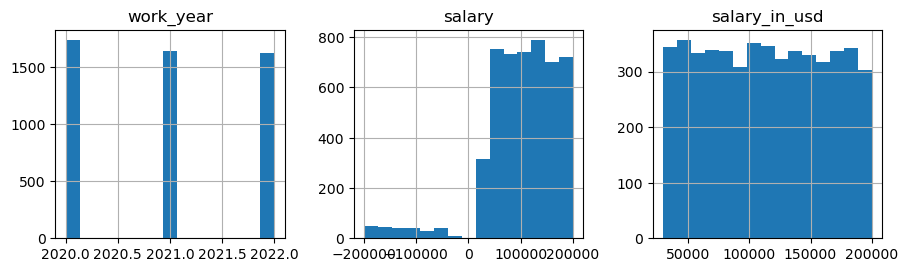

In [2786]:
# Visualisasi distribusi untuk kolom numerikal
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int']).columns
df_cleaned[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(4, 5))
plt.tight_layout()
plt.show()

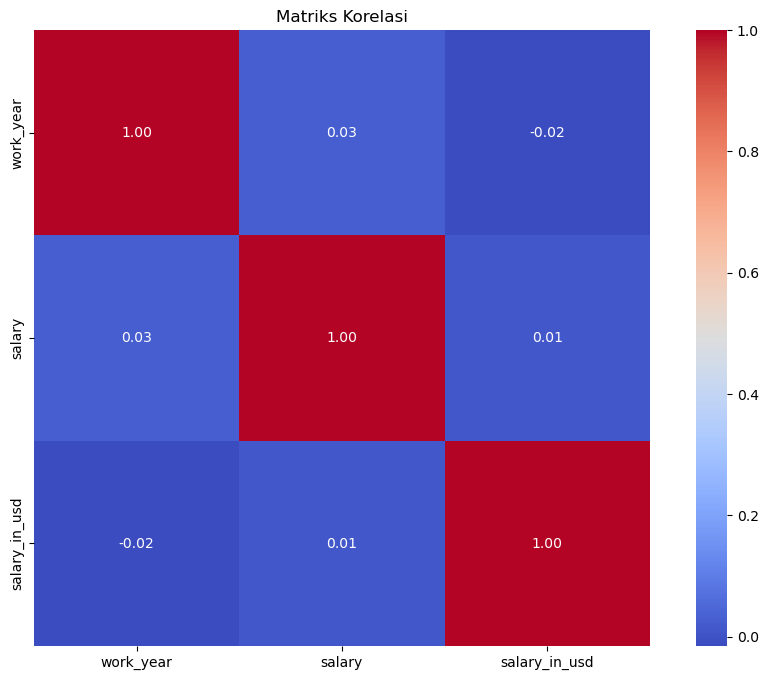

In [2787]:
# Visualisasi hubungan antar variabel (misalnya, matriks korelasi)
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriks Korelasi')
plt.show()


Chart Distribusi job_title


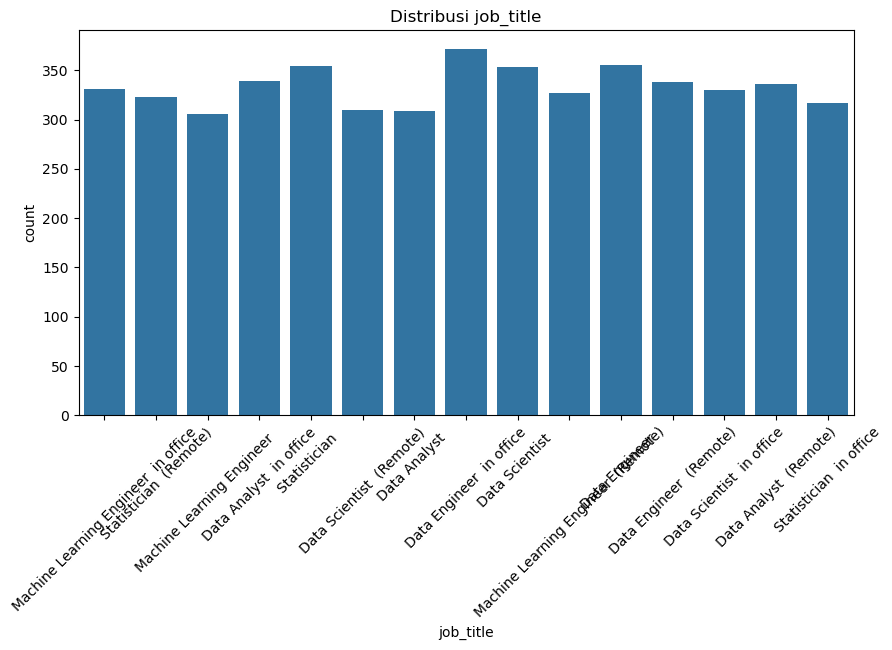


Chart Distribusi job_category


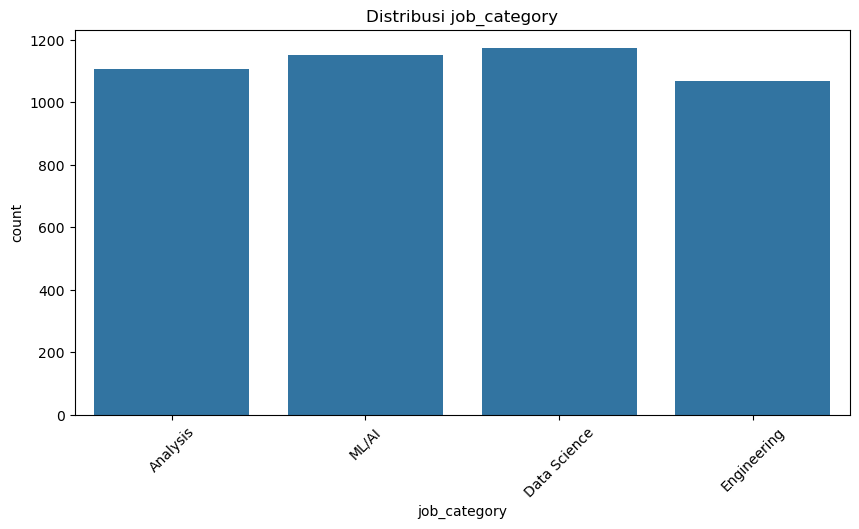


Chart Distribusi salary_currency


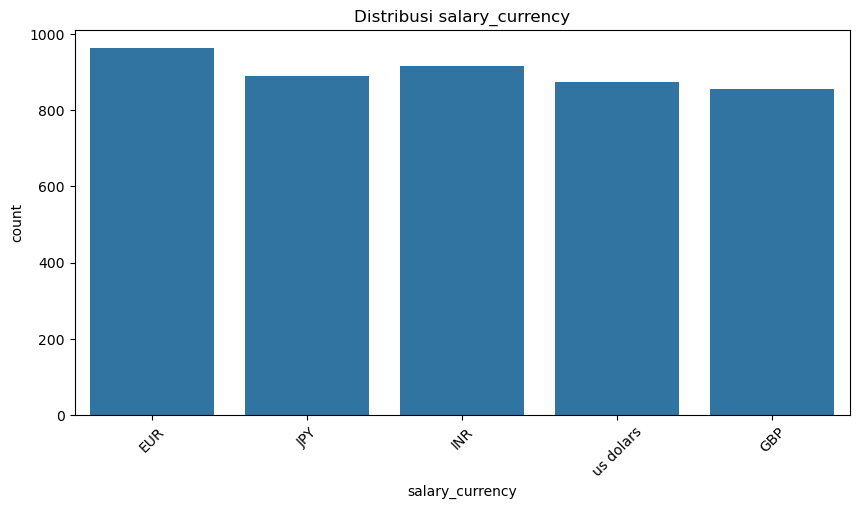


Chart Distribusi employee_residence


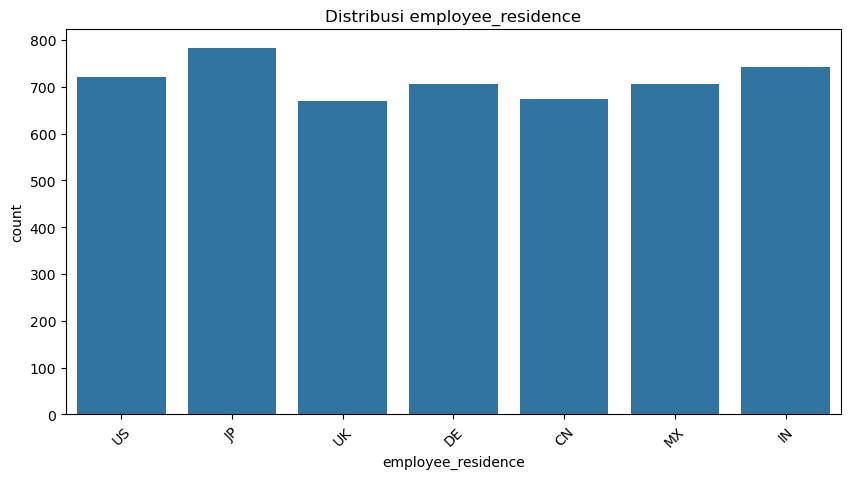


Chart Distribusi experience_level


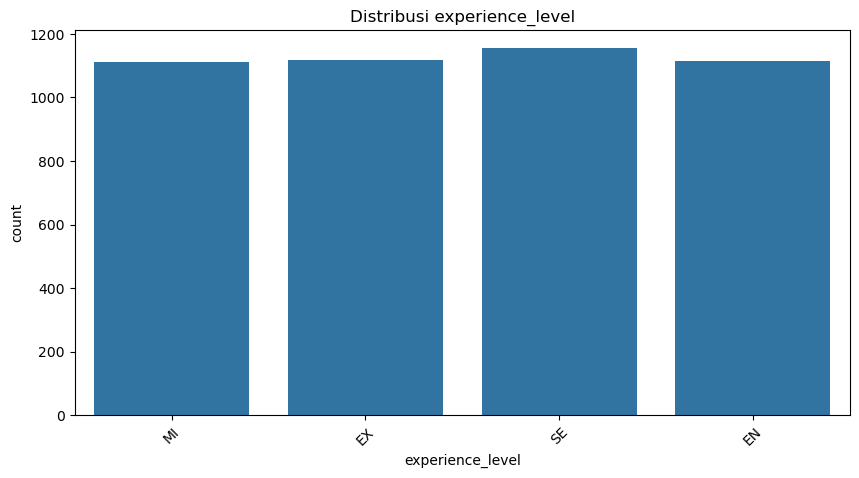


Chart Distribusi employment_type


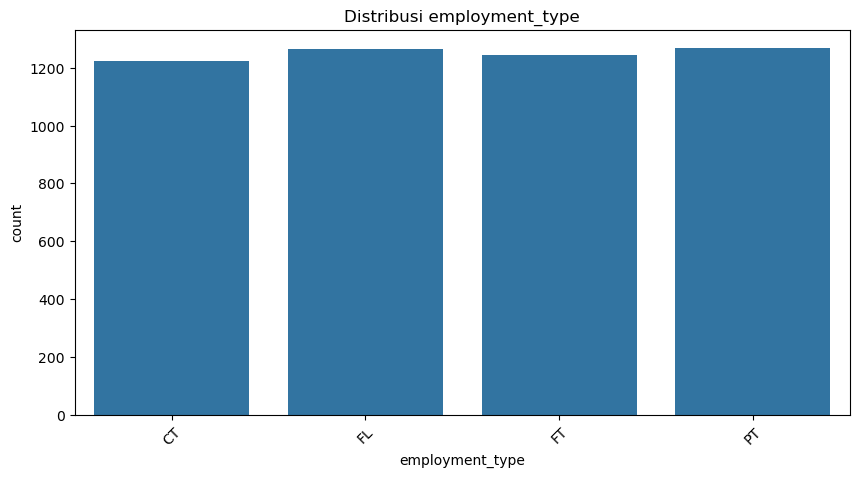


Chart Distribusi work_setting


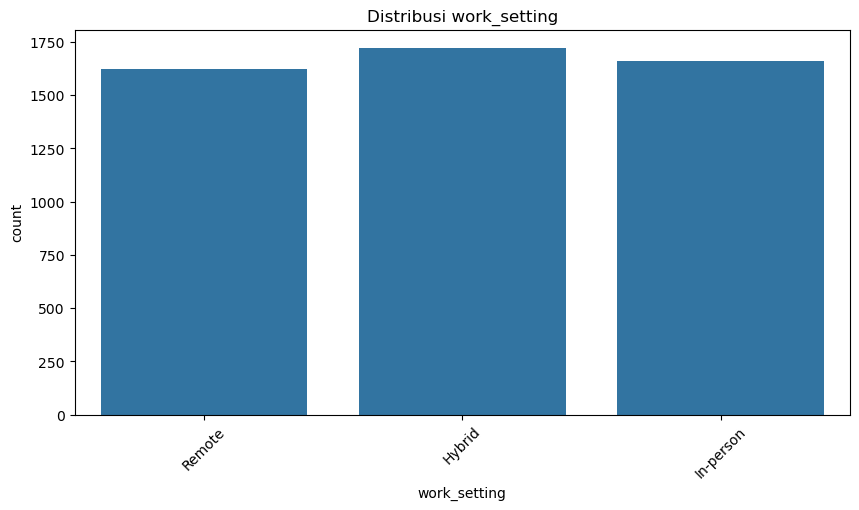


Chart Distribusi company_location


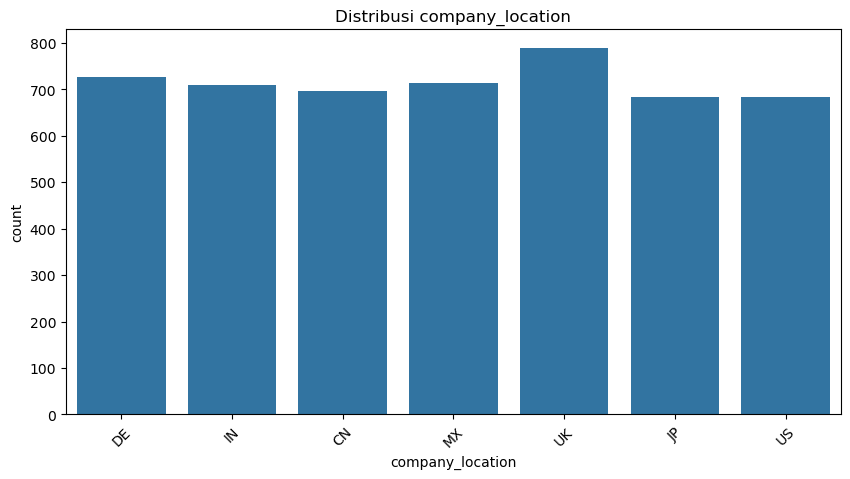


Chart Distribusi company_size


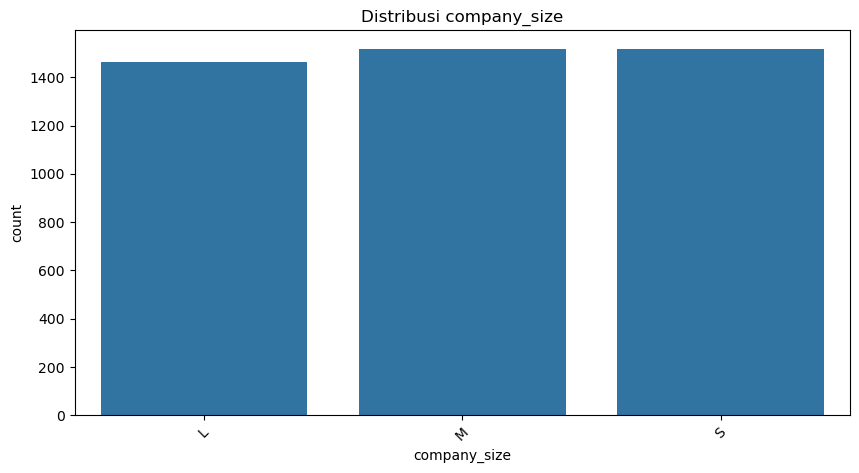

In [2788]:
# Visualisasi untuk variabel kategorikal
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f'\nChart Distribusi {col}')
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_cleaned, x=col)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [2791]:
# 1. Menghapus atau Menangani Data Kosong (Missing Values)

categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64']).columns

In [2792]:
# Mengisi nilai kosong pada kolom kategorikal
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [2793]:
# Mengisi nilai kosong pada kolom numerikal
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [2794]:
# 2. Menghapus Duplikasi
df = df.drop_duplicates()

In [2795]:
# 3. Pastikan kolom numerikal valid dan tidak ada NaN
def checkIfNulls(df):
    numerical_cols = df.select_dtypes(include=['float64']).columns
    if len(numerical_cols) == 0:
        print("Kolom Numerikal Valid.")
    else:
        # Pastikan tidak ada nilai NaN
        if df[numerical_cols].isnull().values.any():
            print("Terdapat NaN di kolom numerikal.")
        else:
            scaler = StandardScaler()
            df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [2796]:
# 4. Deteksi dan Penanganan Outlier
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]

In [2797]:
checkIfNulls(df)

Kolom Numerikal Valid.


In [2798]:
# Menghapus Outliner
for col in numerical_cols:
    df[col] = remove_outliers_iqr(df[col])

In [2799]:
# 5. Encoding Data Kategorikal
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [2800]:

# 6. Binning (Pengelompokan Data)
bins = [0, 50000, 100000, 150000, 200000]
labels = ['Low', 'Medium', 'High', 'Very High']
df['salary_category'] = pd.cut(df['salary_in_usd'], bins=bins, labels=labels)

In [2801]:
# Hasil akhir
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 47 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   work_year                                       5000 non-null   int64   
 1   salary                                          5000 non-null   int64   
 2   salary_in_usd                                   5000 non-null   int64   
 3   job_title_Data Analyst  (Remote)                5000 non-null   bool    
 4   job_title_Data Analyst  in office               5000 non-null   bool    
 5   job_title_Data Engineer                         5000 non-null   bool    
 6   job_title_Data Engineer  (Remote)               5000 non-null   bool    
 7   job_title_Data Engineer  in office              5000 non-null   bool    
 8   job_title_Data Scientist                        5000 non-null   bool    
 9   job_title_Data Scientist  (Rem

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [2805]:
X = df[features]

In [2806]:
# Normalisasi Data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [2807]:
# PCA untuk mereduksi dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [2808]:
# KMeans Clustering
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans_labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, kmeans_labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score KMeans dengan {k} cluster: {score}')

Silhouette Score KMeans dengan 2 cluster: 0.5912356842240464
Silhouette Score KMeans dengan 3 cluster: 0.6457394279607631
Silhouette Score KMeans dengan 4 cluster: 0.6872095795771073
Silhouette Score KMeans dengan 5 cluster: 0.811000946544137
Silhouette Score KMeans dengan 6 cluster: 0.8717205894175
Silhouette Score KMeans dengan 7 cluster: 0.8744174370907789
Silhouette Score KMeans dengan 8 cluster: 0.8761615287325621
Silhouette Score KMeans dengan 9 cluster: 0.8821183922043556


In [2809]:
# Tentukan jumlah cluster terbaik
best_k = 5 
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10, max_iter=300)
final_kmeans_labels = final_kmeans.fit_predict(X_pca)

In [2810]:
# Evaluasi KMeans
def kmeanEvaluation(X_pca, final_kmeans_labels):
    final_silhouette_score = silhouette_score(X_pca, final_kmeans_labels)
    print(f'Silhouette Score KMeans dengan {best_k} cluster: {final_silhouette_score}')

In [2811]:
# Analisis cluster
def clusterAnalysis(best_k):
    for cluster in range(best_k):
        cluster_points = X_pca[final_kmeans_labels == cluster]
        print(f'Cluster {cluster}: {len(cluster_points)} titik')

    # Evaluasi inertia
    inertia = final_kmeans.inertia_
    print(f'Inertia untuk KMeans dengan {best_k} cluster: {inertia}')

In [2812]:
clusterAnalysis(best_k)

Cluster 0: 1106 titik
Cluster 1: 585 titik
Cluster 2: 1153 titik
Cluster 3: 1088 titik
Cluster 4: 1068 titik
Inertia untuk KMeans dengan 5 cluster: 88.95211755721698


In [2813]:
kmeanEvaluation(X_pca, final_kmeans_labels)

Silhouette Score KMeans dengan 5 cluster: 0.811000946544137


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [2816]:
# Evaluasi KMeans
def kmeanEval(X_pca, final_kmeans_labels):
    final_silhouette_score = silhouette_score(X_pca, final_kmeans_labels)
    print(f'Silhouette Score untuk KMeans dengan {best_k} cluster: {final_silhouette_score}')

In [2817]:
# Cluster Analisis
def clusterAnalysis(best_k):
    for cluster in range(best_k):
        cluster_points = X_pca[final_kmeans_labels == cluster]
        print(f'Cluster {cluster}: {len(cluster_points)} titik')
    
    # Inertia Kmean
    inertia = final_kmeans.inertia_
    print(f'Inertia KMeans dengan {best_k} cluster: {inertia}')

In [2818]:
kmeanEval(X_pca, final_kmeans_labels)

Silhouette Score untuk KMeans dengan 5 cluster: 0.811000946544137


In [2819]:
clusterAnalysis(best_k)

Cluster 0: 1106 titik
Cluster 1: 585 titik
Cluster 2: 1153 titik
Cluster 3: 1088 titik
Cluster 4: 1068 titik
Inertia KMeans dengan 5 cluster: 88.95211755721698


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [2822]:
# Normalisasi fitur numerik
scaler = StandardScaler()
numerical_features = ['salary', 'salary_in_usd', 'work_year']
scaled_features = scaler.fit_transform(df[numerical_features])

In [2823]:
# Seleksi fitur berdasarkan varians
selector = VarianceThreshold(threshold=0.1)  # Threshold dapat disesuaikan
selected_features = selector.fit_transform(scaled_features)
selected_columns = [numerical_features[i] for i in range(len(numerical_features)) if selector.get_support()[i]]

print("Fitur terpilih berdasarkan varians:", selected_columns)

Fitur terpilih berdasarkan varians: ['salary', 'salary_in_usd', 'work_year']


In [2824]:
# Membuat DataFrame dari fitur yang telah dinormalisasi
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features)

# Hitung matriks korelasi
correlation_matrix = scaled_df.corr()

# Cari fitur dengan korelasi tinggi (threshold > 0.8)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

print("Fitur dengan korelasi tinggi yang akan dihapus:", high_corr_features)

Fitur dengan korelasi tinggi yang akan dihapus: []


In [2825]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

print("Variansi yang dijelaskan oleh komponen PCA:", pca.explained_variance_ratio_)

Variansi yang dijelaskan oleh komponen PCA: [0.34259801 0.33631251]


In [2826]:
# Clustering tanpa feature selection
kmeans_original = KMeans(n_clusters=5, random_state=42)
labels_original = kmeans_original.fit_predict(scaled_features)

# Clustering dengan feature selection
kmeans_selected = KMeans(n_clusters=5, random_state=42)
labels_selected = kmeans_selected.fit_predict(selected_features)

# Evaluasi dengan silhouette score
score_original = silhouette_score(scaled_features, labels_original)
score_selected = silhouette_score(selected_features, labels_selected)

print("Silhouette Score sebelum feature selection:", score_original)
print("Silhouette Score setelah feature selection:", score_selected)

Silhouette Score sebelum feature selection: 0.30805745165353565
Silhouette Score setelah feature selection: 0.30805745165353565


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

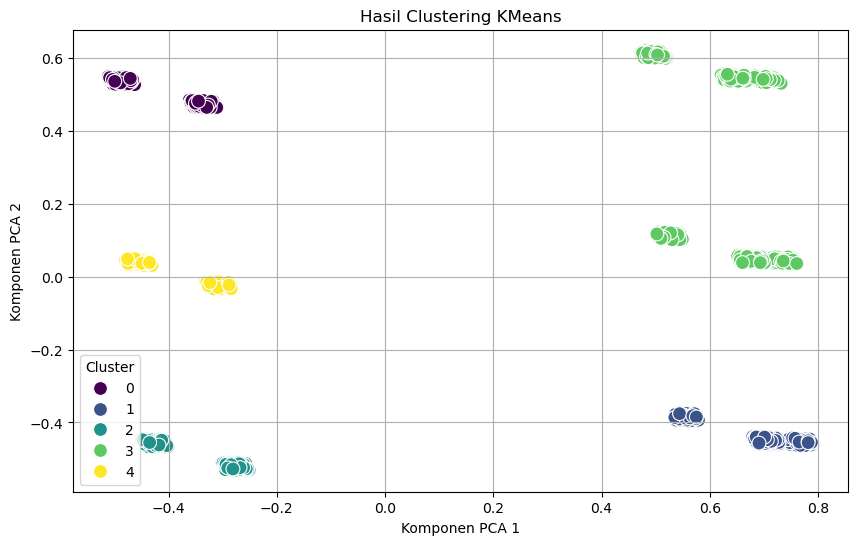

In [2829]:
# Visualisasi hasil clustering KMeans
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=final_kmeans_labels, palette='viridis', s=100)
plt.title('Hasil Clustering KMeans')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [2832]:
# Menambahkan label cluster ke DataFrame
df['Cluster'] = final_kmeans_labels

In [2833]:
# Analisa Karakteristik setiap Cluster
cluster_summary = df.groupby('Cluster').agg({
    'work_year': ['mean', 'std', 'count'],
    'salary': ['mean', 'std'],
    'salary_in_usd': ['mean', 'std'],
    'job_category_Data Science': 'mean',
    'salary_currency_us dolars': 'mean'
}).reset_index()

print("Ringkasan Karakteristik Setiap Cluster:")
print(cluster_summary)

Ringkasan Karakteristik Setiap Cluster:
  Cluster    work_year                         salary                 \
                  mean       std count           mean            std   
0       0  2022.000000  0.000000  1106  115293.911392   48704.434267   
1       1  2020.000000  0.000000   585   72874.705983  102907.982736   
2       2  2020.000000  0.000000  1153  113338.566349   49520.216390   
3       3  2021.474265  0.499567  1088   80542.970588   93142.783285   
4       4  2021.000000  0.000000  1068  114021.205993   48788.929246   

   salary_in_usd               job_category_Data Science  \
            mean           std                      mean   
0  111988.658228  48438.489032                       0.0   
1  115769.338462  48915.515516                       1.0   
2  113497.857762  49141.493189                       0.0   
3  113988.502757  49637.731640                       1.0   
4  116028.032772  49337.175046                       0.0   

  salary_currency_us dolars  
    

In [2834]:
# Interpretasi Hasil Clustering
for cluster_id in cluster_summary['Cluster']:
    cluster_data = cluster_summary[cluster_summary['Cluster'] == cluster_id]
    print(f"\nKarakteristik Cluster {cluster_id}:")
    print(cluster_data)

print("\nInterpretasi Clustering:")


Karakteristik Cluster 0:
  Cluster work_year                    salary                salary_in_usd  \
               mean  std count           mean           std           mean   
0       0    2022.0  0.0  1106  115293.911392  48704.434267  111988.658228   

                job_category_Data Science salary_currency_us dolars  
            std                      mean                      mean  
0  48438.489032                       0.0                  0.202532  

Karakteristik Cluster 1:
  Cluster work_year                   salary                 salary_in_usd  \
               mean  std count          mean            std           mean   
1       1    2020.0  0.0   585  72874.705983  102907.982736  115769.338462   

                job_category_Data Science salary_currency_us dolars  
            std                      mean                      mean  
1  48915.515516                       1.0                  0.140171  

Karakteristik Cluster 2:
  Cluster work_year             

Tulis hasil interpretasinya di sini.
## **Interpretasi Hasil Clustering**

### Ringkasan Karakteristik Tiap Cluster

Setelah melakukan clustering, kita mendapatkan lima cluster yang memiliki karakteristik yang berbeda. Berikut adalah analisis dari masing-masing cluster berdasarkan fitur yang tersedia:

### **Interpretasi Hasil Clustering**

**Cluster 0**:
- **Karakteristik**:
  - Tahun kerja rata-rata: **2022** (relatif baru).
  - Jumlah individu: **1106**.
  - Gaji rata-rata: **115,294** dengan standar deviasi **48,704**.
  - Gaji dalam USD rata-rata: **111,989** dengan standar deviasi **48,438**.
  - **Data Science** bukanlah kategori pekerjaan dominan di cluster ini (rata-rata = **0.0**).
  - **20.25%** dari cluster ini menggunakan mata uang USD untuk gaji.
- **Interpretasi**:
  - Cluster ini berisi individu dengan tahun kerja terkini (2022), gaji tinggi, dan lebih umum berada di kategori pekerjaan selain Data Science.

---

**Cluster 1**:
- **Karakteristik**:
  - Tahun kerja rata-rata: **2020**.
  - Jumlah individu: **585**.
  - Gaji rata-rata: **72,875** dengan standar deviasi tinggi **102,908**.
  - Gaji dalam USD rata-rata: **115,769** dengan standar deviasi **48,915**.
  - Seluruh individu di cluster ini berada di kategori pekerjaan **Data Science** (rata-rata = **1.0**).
  - **14.02%** menggunakan mata uang USD untuk gaji.
- **Interpretasi**:
  - Cluster ini mencakup individu dengan pengalaman kerja yang lebih lama (2020), fokus sepenuhnya pada Data Science, namun dengan gaji rata-rata yang lebih rendah dibanding cluster lain.

---

**Cluster 2**:
- **Karakteristik**:
  - Tahun kerja rata-rata: **2020**.
  - Jumlah individu: **1153**.
  - Gaji rata-rata: **113,339** dengan standar deviasi **49,520**.
  - Gaji dalam USD rata-rata: **113,498** dengan standar deviasi **49,141**.
  - **Data Science** bukan kategori dominan di cluster ini (rata-rata = **0.0**).
  - **18.21%** menggunakan mata uang USD untuk gaji.
- **Interpretasi**:
  - Cluster ini terdiri dari individu dengan pengalaman kerja sejak 2020, memiliki gaji tinggi, dan kebanyakan tidak berada di kategori pekerjaan Data Science.

---

**Cluster 3**:
- **Karakteristik**:
  - Tahun kerja rata-rata: **2021.47**.
  - Jumlah individu: **1088**.
  - Gaji rata-rata: **80,543** dengan standar deviasi tinggi **93,143**.
  - Gaji dalam USD rata-rata: **113,989** dengan standar deviasi **49,638**.
  - Seluruh individu di cluster ini berada di kategori pekerjaan **Data Science** (rata-rata = **1.0**).
  - **13.88%** menggunakan mata uang USD untuk gaji.
- **Interpretasi**:
  - Cluster ini terdiri dari individu dengan pengalaman kerja mulai sekitar 2021, gaji moderat, dan fokus sepenuhnya pada pekerjaan Data Science.

---

**Cluster 4**:
- **Karakteristik**:
  - Tahun kerja rata-rata: **2021**.
  - Jumlah individu: **1068**.
  - Gaji rata-rata: **114,021** dengan standar deviasi **48,789**.
  - Gaji dalam USD rata-rata: **116,028** dengan standar deviasi **49,337**.
  - **Data Science** bukan kategori dominan di cluster ini (rata-rata = **0.0**).
  - **19.48%** menggunakan mata uang USD untuk gaji.
- **Interpretasi**:
  - Cluster ini berisi individu dengan pengalaman kerja dari 2021, gaji tinggi, dan tidak mendominasi di kategori pekerjaan Data Science.

---

### **Kesimpulan Umum**:
- **Cluster 1 dan Cluster 3** adalah kelompok individu yang sepenuhnya berada di kategori pekerjaan **Data Science**, tetapi mereka berbeda dalam pengalaman kerja dan gaji. **Cluster 0, 2, dan 4** mencakup individu yang sebagian besar tidak berada di kategori Data Science, dengan Cluster 0 menunjukkan tahun kerja paling baru. **Penggunaan mata uang USD** relatif rendah di semua cluster, tetapi Cluster 0 memiliki proporsi tertinggi (**20.25%**). Standar deviasi tinggi dalam beberapa cluster (contoh Cluster 1 dan Cluster 3) menunjukkan variasi gaji yang besar, hal ini mencerminkan perbedaan besar dalam tingkat pengalaman atau lokasi.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [2837]:
# Menyimpan hasil clustering ke dalam file csv
df['Cluster'] = final_kmeans_labels

if os.path.exists(output_file_path):
    os.remove(output_file_path)

df.to_csv(output_file_path, index=False)
print(f"Menyimpan hasil Clustering ke {output_file_path}")

Menyimpan hasil Clustering ke ./clean/data-science-jobs-salaries-clean.csv
